# WAID - Plot an amplitude image log and segment it using custom or automatized (Otsu's) thresholds

**Created by:** Rewbenio A. Frota

This notebook briefly shows how to load image data froma  well and do some basic segmentation analysis.

## Import dependencies

In [46]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Important functions

* concat_IMG_data() loads image data from multiple files;
* Image_plot() plots a slice of an image log.

In [47]:
# To load image data from multiple files
def concat_IMG_data(well_id, data_path):
    # Due to file size limitations, the original AMP '.csv' file
    # has been split into several sub-files.
    # The concat_IMG_data() function aims to concatenate
    # them back into a single data object.
    #
    # concat_IMG_data() returns 'image_df', a Pandas dataframe
    # indexed by DEPTH information and whose columns are
    # the azimuthal coordinates of the AMP image log.
    
    # Name of the initial '00' file
    initial_file = well_id + "_AMP00.csv"

    # Read the the initial file to capture header information
    initial_file_path = os.path.join(data_path, initial_file)
    image_df = pd.read_csv(initial_file_path,sep = ';',
                           index_col=0,
                           na_values = -9999,na_filter = True,
                           decimal = ',',
                           skip_blank_lines = True).dropna()

    # Read and add data from the remaining files sequentially
    for file in os.listdir(data_path):
        if file.startswith(well_id) and file != initial_file:
            file_path = os.path.join(data_path, file)
            df_temp = pd.read_csv(file_path,sep = ';',
                                  header=None,index_col = 0,
                                  na_values = -9999, na_filter = True,
                                  decimal = ',', skip_blank_lines = True,
                                  dtype=np.float32
                                 ).dropna()
            
            # Adjust tem df's header to match image header
            df_temp.columns=image_df.columns
            
            # Concat dfs
            image_df = pd.concat([image_df, df_temp])
    return image_df

# To plot an image log
def Image_plot(image_df):
    # Plots AMP image using appropriate colormap
    
    fig, ax = plt.subplots(figsize=(4, 9), dpi=100)  # Create a figure containing a single axes.
    ax.ticklabel_format(useOffset = False)
    ax.invert_yaxis()
    ax.set_xlabel('AMP Image')   
              
    ax.imshow(image_df,
              extent=[0, len(image_df.columns), min(image_df.index), max(image_df.index)],
              cmap='afmhot',
              vmin= np.mean(image_df.values) - np.std(image_df.values),
              vmax= np.mean(image_df.values) + np.std(image_df.values),
              aspect='auto'
              )
            
    plt.ticklabel_format(useOffset=False)
    plt.show()

## Import image data from CSV files

In [48]:
# Location of the AMP image data files
img_data_path = r"..\dataset\img"

In [49]:
# Well identifier
well_identifier = "antilope25"    #antilope25  tatu22 botorosa47 coala88  antilope37

In [50]:
# Load full image data
img_data = concat_IMG_data(well_identifier,img_data_path)

In [51]:
img_data

,IMG_AMP[0],IMG_AMP[1],IMG_AMP[2],IMG_AMP[3],IMG_AMP[4],IMG_AMP[5],IMG_AMP[6],IMG_AMP[7],IMG_AMP[8],IMG_AMP[9],...,IMG_AMP[170],IMG_AMP[171],IMG_AMP[172],IMG_AMP[173],IMG_AMP[174],IMG_AMP[175],IMG_AMP[176],IMG_AMP[177],IMG_AMP[178],IMG_AMP[179]
2061.13000,28.890024,22.962513,26.863455,20.350410,21.469110,18.456787,17.750984,19.407518,23.745337,24.397213,...,33.438011,33.403587,33.797421,33.861107,33.922779,34.746162,34.663971,34.814106,34.114758,32.588291
2061.13000,29.739786,23.510401,23.942596,19.914707,18.483414,16.647999,17.090069,20.236053,23.870237,21.366535,...,33.066406,33.372677,33.986809,34.182320,34.171627,34.723675,33.778473,33.721893,34.119743,32.458557
2061.13000,30.690826,25.153517,20.223940,19.503544,15.972180,16.479443,19.550108,24.187971,26.089886,18.856203,...,33.053772,33.851429,34.665356,34.742390,34.669258,34.474701,32.426815,32.147968,33.784061,32.482365
2061.13000,31.061068,24.869429,21.005619,20.406025,15.127856,18.330606,22.249298,24.100208,26.099499,20.849535,...,33.020370,34.050522,35.085823,35.068775,34.185238,33.421448,30.606180,31.023764,33.554806,30.339273
2061.14000,31.079399,23.413807,24.528269,21.875820,15.519221,21.085449,25.090755,21.560568,24.760717,25.672018,...,32.974632,34.080048,35.347347,35.251736,33.116596,31.894188,28.513935,30.177408,33.391521,26.961018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618.98999,36.321396,37.268875,37.794128,37.214928,36.372284,29.929642,35.146889,35.793072,34.451157,34.770584,...,36.444599,34.184910,34.226543,34.248325,34.965584,36.760170,37.211315,37.211315,36.482605,35.774345
2618.98999,37.026203,37.442673,37.619087,37.969723,36.013115,30.121517,35.292522,35.889198,34.165962,34.541817,...,36.330509,34.193790,34.022476,33.713428,34.940216,36.840370,37.074146,37.074146,36.317741,36.242729
2618.98999,37.310883,37.481247,37.746609,36.968349,35.679874,30.886662,35.676590,35.836628,33.986698,34.798214,...,36.414120,34.765434,34.441612,34.689789,35.715790,37.017696,36.908371,36.908371,36.455357,36.729725
2618.98999,37.536060,37.499683,37.845757,36.169277,35.336132,31.567297,35.987274,35.767067,33.863163,35.045578,...,36.497814,35.329144,34.911461,35.628658,36.440720,37.164108,36.733021,36.733021,36.574280,37.165203


In [52]:
img_data = img_data.iloc[img_data.index > 2065.52]  # Deleting spurious values at the top of the image file
img_data = img_data.iloc[img_data.index <= 2277.10]     # Interest limit

## Plot an image slice

In [53]:
slice_img_df = img_data.iloc[600:1200]   #User defined data slice

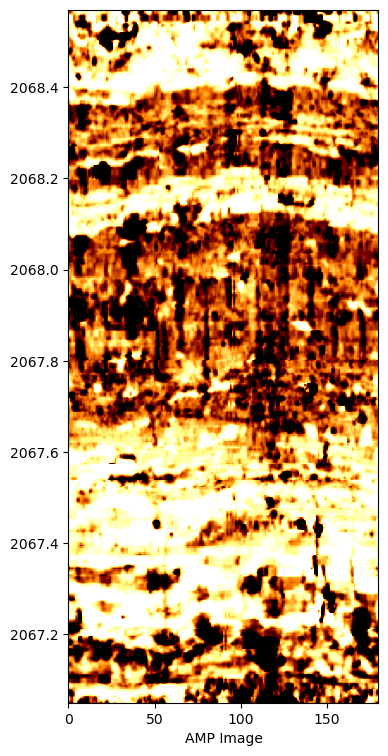

In [54]:
Image_plot(slice_img_df)

## Plot AMP (dB) Histogram according to range values

Plot AMP histogram and segment image according the definitions present in [Menezes de Jesus et al, 2016](https://onepetro.org/petrophysics/article/57/06/620/171448/Permeability-Estimation-Using-Ultrasonic-Borehole).

In [55]:
# Flatten amplitude values
data = img_data.values.flatten('F')

In [56]:
# User definded thresholds
threshold = [26, 34, 37]

# User definded range
range_dB = np.array((-20, 40))

# User definded number of bins in histogram
n_bins = 50

# range for every bin
delta_bin = np.abs((range_dB[1] - range_dB[0]))/n_bins

# Compute the number of bins per class based on 'delta_bin'
range_bins = np.array((int((threshold[0] - range_dB[0])//delta_bin),
                       int((threshold[1] - range_dB[0])//delta_bin),
                       int((threshold[2] - range_dB[0])//delta_bin)))

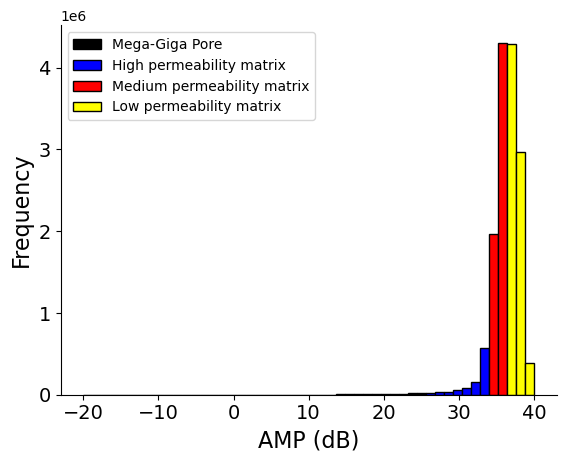

In [57]:
from matplotlib.patches import Rectangle

N, bins, patches = plt.hist(data, bins=n_bins, ec="k", range=(range_dB[0], range_dB[1]))

mgp = (0.0, 0.0, 0.0, 1.0)    # for Mega-Giga Pore values
hpm = (0.0, 0.0, 1.0, 1.0)    # for High-Permeability matrix values
mpm = (1.0, 0.0, 0.0, 1.0)    # for Medium-Permeability matrix values
lpm = (1.0, 1.0, 0.0, 1.0)    # for Low-Permeability matrix values


for i in range(0,range_bins[0]):
    patches[i].set_facecolor(mgp)
    
for i in range(range_bins[0],range_bins[1]):
    patches[i].set_facecolor(hpm)
    
for i in range(range_bins[1],range_bins[2]):
    patches[i].set_facecolor(mpm)
    
for i in range(range_bins[2],n_bins):
    patches[i].set_facecolor(lpm)

#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [mgp, hpm, mpm, lpm]]
labels= ['Mega-Giga Pore', 'High permeability matrix', 'Medium permeability matrix', 'Low permeability matrix']
plt.legend(handles, labels)

plt.xlabel('AMP (dB)', fontsize=16)  
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)

plt.gca().spines["top"].set_visible(False)  
plt.gca().spines["right"].set_visible(False)

plt.show()

## Segment after histogram categories

In [58]:
amp_array = img_data.values
amp_segment = np.zeros(amp_array.shape)

for i, img_row in enumerate(amp_array):
    for j, amp_value in enumerate(img_row):
        
        if amp_value <= threshold[0]:
            amp_segment[i][j] = 3
        elif amp_value <= threshold[1]:
            amp_segment[i][j] = 2
        elif amp_value <= threshold[2]:
            amp_segment[i][j] = 1
        else:
            amp_segment[i][j] = 0

In [59]:
seg_df = pd.DataFrame(amp_segment)

seg_df.insert(0, column = 'DEPTH', value = img_data.index)
seg_df.set_index('DEPTH', inplace=True)

In [60]:
seg_df

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
DEPTH,,,,,,,,,,,,,,,,,,,,,
2065.530000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
2065.530000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
2065.530000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
2065.530000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
2065.540000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277.080078,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2277.080078,2.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2277.090088,3.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [61]:
# Creat custom colormaps to plot segmentations
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['yellow', 'red', 'blue', 'black'])
custom_cmap_r = ListedColormap(['black', 'blue', 'red', 'yellow'])

In [62]:
slice_seg_df = seg_df.iloc[600:1200]

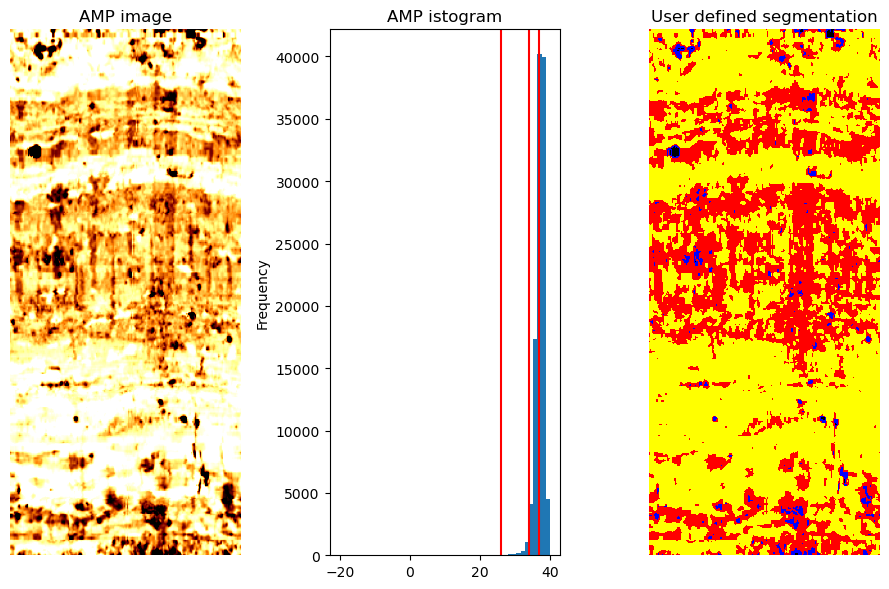

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,6), dpi=100)

# Plotting the original seg_df.
ax[0].imshow(slice_img_df, cmap='afmhot',aspect='auto',vmin= np.mean(img_data.values) - np.std(img_data.values),
              vmax= np.mean(img_data.values) + np.std(img_data.values))
ax[0].set_title('AMP image')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(slice_img_df.values.flatten('F'), bins = bins)
ax[1].set_title('AMP istogram')
for thresh in threshold:
    ax[1].axvline(thresh, color='r')
ax[1].set_ylabel("Frequency")

# Plotting the Multi Otsu result.
ax[2].imshow(slice_seg_df, cmap=custom_cmap, aspect='auto')
ax[2].set_title('User defined segmentation')
ax[2].axis('off')

plt.subplots_adjust()
plt.tight_layout()
plt.show()

## Otsu (multi) thresholding

Otsu's method [(1)](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) allows to automatically determining the thresholds after an image's predetermined number of classes according to its pixel's intensity levels.

In [64]:
from skimage.filters import threshold_otsu, threshold_multiotsu

In [65]:
image = slice_img_df.values

In [66]:
otsu_thresholds = threshold_multiotsu(img_data.values, classes=4)
#binary_otsu = ndvi > thresh

print(otsu_thresholds)

[27.27708416 34.57956835 36.6659924 ]


In [67]:
# Using the threshold values for the 4 classes
regions = np.digitize(image, bins=otsu_thresholds)

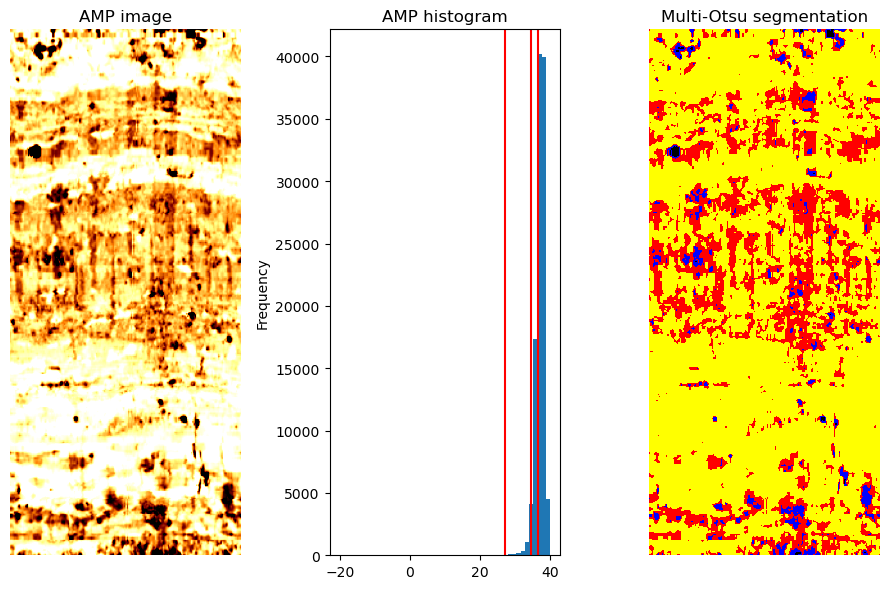

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,6), dpi=100)

# Plotting the original seg_df.
ax[0].imshow(image, cmap='afmhot',aspect='auto',vmin= np.mean(img_data.values) - np.std(img_data.values),
              vmax= np.mean(img_data.values) + np.std(img_data.values))
ax[0].set_title('AMP image')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.flatten('F'), bins = bins)
ax[1].set_title('AMP histogram')
for thresh in otsu_thresholds:
    ax[1].axvline(thresh, color='r')
ax[1].set_ylabel("Frequency")

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap=custom_cmap_r, aspect='auto')
ax[2].set_title('Multi-Otsu segmentation')
ax[2].axis('off')

plt.subplots_adjust()
plt.tight_layout()
plt.show()

In [69]:
# Compute the number of bins per class based on 'delta_bin'
otsu_range_bins = np.array((int((otsu_thresholds[0] - range_dB[0])//delta_bin),
                            int((otsu_thresholds[1] - range_dB[0])//delta_bin),
                            int((otsu_thresholds[2] - range_dB[0])//delta_bin)))

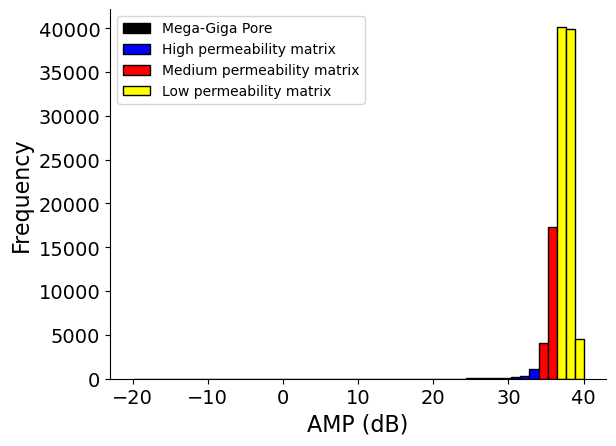

In [70]:
data = image.flatten('F')
N, bins, patches = plt.hist(data, bins = n_bins, ec="k", range = (range_dB[0], range_dB[1]))

mgp = (0.0, 0.0, 0.0, 1.0)
hpm = (0.0, 0.0, 1.0, 1.0)
mpm = (1.0, 0.0, 0.0, 1.0)
lpm = (1.0, 1.0, 0.0, 1.0)


for i in range(0,otsu_range_bins[0]):
    patches[i].set_facecolor(mgp)
    
for i in range(otsu_range_bins[0],otsu_range_bins[1]):
    patches[i].set_facecolor(hpm)
    
for i in range(otsu_range_bins[1],otsu_range_bins[2]):
    patches[i].set_facecolor(mpm)
    
for i in range(otsu_range_bins[2],n_bins):
    patches[i].set_facecolor(lpm)

#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [mgp, hpm, mpm, lpm]]
labels= ['Mega-Giga Pore', 'High permeability matrix', 'Medium permeability matrix', 'Low permeability matrix']
plt.legend(handles, labels)

plt.xlabel('AMP (dB)', fontsize=16)  
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)

plt.gca().spines["top"].set_visible(False)  
plt.gca().spines["right"].set_visible(False)

plt.show()